In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
%matplotlib inline
svm1 = svm.SVC(C=1, gamma=0.0001, probability=True, kernel = 'linear')
nb = GaussianNB(var_smoothing=1.873817422860383e-08)
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')
dt = DecisionTreeClassifier(criterion='entropy', max_depth=890, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       splitter='random')
lrr = LogisticRegression(C=0.0005, max_iter=2011, multi_class='ovr',
                   solver='newton-cg')
lr = LogisticRegression()
svm2 = svm.SVC(probability=True)
bagging = BaggingClassifier()
boosting = GradientBoostingClassifier()
stacking = StackingClassifier(classifiers=[svm1, nb, knn, dt, lrr], meta_classifier = svm2)

In [2]:
data = pd.read_csv('EQ.csv')
data.shape

(324, 62)

In [ ]:
data.head()

In [5]:
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        
        def convert_to_int(val):
            return text_digit_values[val]
        
        if(df[column].dtype != np.int64 and df[column].dtype != np.float64):
            column_elements = df[column].values.tolist()
            unique_elements = set(column_elements)
#             print(unique_elements)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

data = handle_non_numeric_data(data)
print(data.head())

   ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             3   0.002547    0.002555   
1                            37   0.008643    0.004756   
2                             3   0.001479    0.009143   
3                            10   0.005642    0.005395   
4                             1   0.001350    0.000000   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  4                           0.00   
1                                 71                           0.00   
2                                  5                           1.01   
3                                 38                           0.00   
4                                  1                           1.01   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     3.04     0.393707                    0.003049   
1                    14.37     2.093750                    0.001481   
2          

In [6]:
array = data.values
X = array[:,0:61]
Y = array[:,61]

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = bagging
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

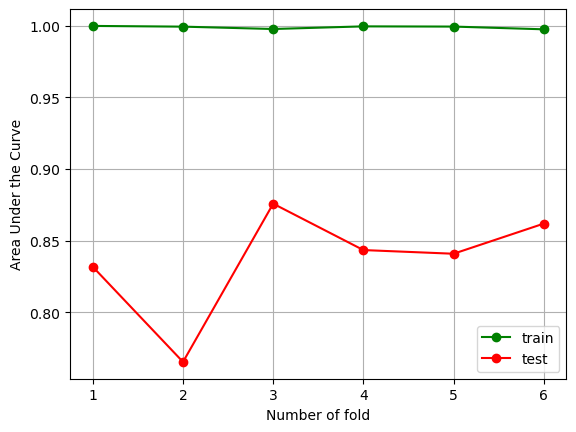

In [12]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [13]:
n_estimators = [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_samples = [x / 10 for x in range(1, 11)]
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.90, 0.92, 0.95, 1.0]
bootstrap = [True, False]
bootstrap_features = [True, False]
oob_score = [True, False]
warm_start = [True, False]

random_grid = {
    'n_estimators':n_estimators,
    'max_samples':max_samples,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'bootstrap_features':bootstrap_features,
    'oob_score':oob_score,
    'warm_start':warm_start
}
print(random_grid)

{'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False], 'oob_score': [True, False], 'warm_start': [True, False]}


In [14]:
dt_randomcv=RandomizedSearchCV(estimator=bagging,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_fea

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.4, max_samples=1.0, n_estimators=400, oob_score=False, warm_start=False; total time=   0.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   0.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   0.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   1.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=1.0, n_estimators=1000, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=1.0, n_estimators=1000, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=Fa

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.1s
[CV] END bootstrap=True, bootstrap_features=False, max_featur

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.7, n_estimators=200, oob_score=False, warm_start=True; total time=   0.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.7, max_samples=0.1, n_estimators=20, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.7, max_samples=0.1, n_estimators=20, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.7, max_samples=0.1, n_estimators=20, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.6, n_estimators=600, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.6, n_estimators=600, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.7, max_samples=0.9, n_estimators=400, oob_score=False, warm_start=True; total time=   0.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.7, max_samples=0.9, n_estimators=400, oob_score=False, warm_start=True; total time=   0.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=100, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=100, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=100, oob_score=False, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.2, n_estimators=50, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_featur

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
93 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 354, in _fit
    raise ValueError("Out of bag estimate only a

RandomizedSearchCV(cv=3, estimator=BaggingClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.85, 0.9, 0.92, 0.95,
                                                         1.0],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                        0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'n_estimators': [20, 50, 100, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000],
                                        

In [15]:
dt_randomcv.best_params_

{'warm_start': False,
 'oob_score': False,
 'n_estimators': 1000,
 'max_samples': 0.7,
 'max_features': 0.5,
 'bootstrap_features': False,
 'bootstrap': False}

In [16]:
param_grid = {
    'n_estimators': [700, 800, 1000, 1100, 1200, 1400],
    'max_features': [0.92, 0.75, 1.0, 0.5, 0.35, 0.25],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'warm_start': [False,True],
    'oob_score': [False,True]
}
print(param_grid)

{'n_estimators': [700, 800, 1000, 1100, 1200, 1400], 'max_features': [0.92, 0.75, 1.0, 0.5, 0.35, 0.25], 'bootstrap': [True, False], 'bootstrap_features': [True, False], 'warm_start': [False, True], 'oob_score': [False, True]}


In [18]:
grid_search=GridSearchCV(estimator=bagging,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.3s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] E

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.3s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.2s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] E

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=False, warm_start=True; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.7s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=False, warm_start=True; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] E

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=False, warm_start=True; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] E

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.9s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   2.6s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.6s

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.9s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   2.4s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.9s

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.5s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.7s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   4.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=False, warm_start=True; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   2.1s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.5s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.1s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=False, warm_start=True; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.2s

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.8s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.3s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=False, warm_start=True; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   1.7s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   2.6s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.9s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   5.5s

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=   5.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=   5.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.4s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.3s

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=False, warm_start=True; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=False, warm_start=True; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   5.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.9s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=   5.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=False, warm_start=True; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=False, warm_start=True; total time=   1.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   3.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   3.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1100, oob_score=False, warm_start=False; total time=

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=   5.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=False, warm_start=True; total time=   5.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   2.6s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1100, oob_score=False, warm_start=False; total time=

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=False, warm_start=True; total time=   4.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=False, warm_start=True; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   3.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   6.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   5.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1100, oob_score=False, warm_start=False; total time=   5.5s

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=   5.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=False, warm_start=True; total time=   5.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=700, oob_score=False, warm_start=False; total time=   2.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=False, warm_start=True; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1100, oob_score=False, warm_start=False; total time=   3.2s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=False, warm_start=True; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.5, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=700, oob_score=False, warm_start=False; total time=   1.7s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=False, warm_start=True; total time=   1.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=False, warm_start=True; total time=   1.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1100, oob_score=False, warm_start=False; total time=

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.35, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=700, oob_score=False, warm_start=False; total time=   1.5s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1100, oob_score=False, warm_start=False; total time=

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=False, warm_start=True; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.25, n_estimators=1200, oob_score=True, warm_start=False; total time=   0.0s

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 354, in _fit
    raise ValueError("Out of bag estimate on

GridSearchCV(cv=10, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.92, 0.75, 1.0, 0.5, 0.35, 0.25],
                         'n_estimators': [700, 800, 1000, 1100, 1200, 1400],
                         'oob_score': [False, True],
                         'warm_start': [False, True]},
             verbose=2)

In [19]:
best_grid = grid_search.best_estimator_
best_grid

BaggingClassifier(bootstrap_features=True, max_features=0.92, n_estimators=1400,
                  oob_score=True)

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

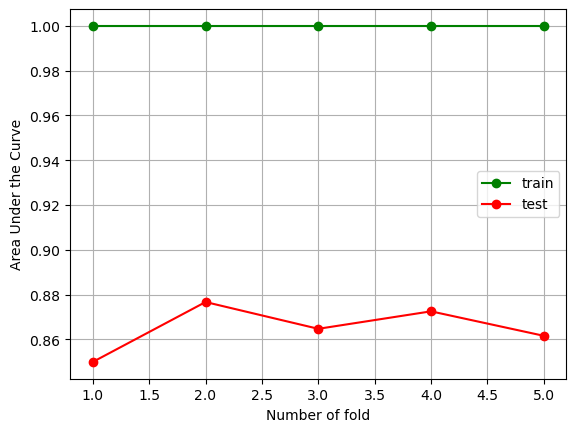

In [21]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[108   0]
 [  0 152]]
Auc Score 0.9999999999999999
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       108
         1.0       1.00      1.00      1.00       152

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

Decision Tree Testing Result
[[18  3]
 [10 33]]
Auc Score 0.8615725359911406
Accuracy Score 0.796875
Classification report:               precision    recall  f1-score   support

         0.0       0.64      0.86      0.73        21
         1.0       0.92      0.77      0.84        43

    accuracy                           0.80        64
   macro avg       0.78      0.81      0.79        64
weighted avg       0.83      0.80      0.80        64



In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = boosting
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

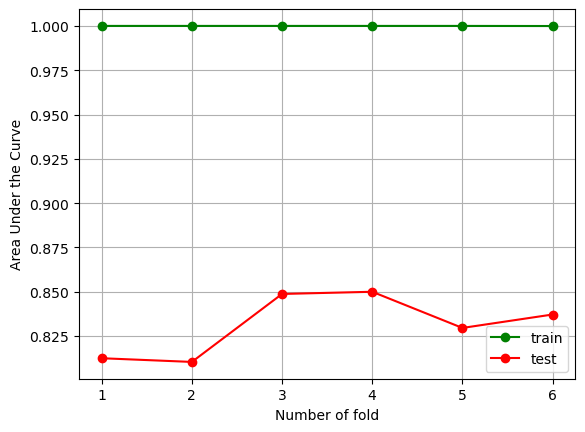

In [24]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [27]:
boosting = GradientBoostingClassifier()
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depth = np.linspace(1, 32, 32, endpoint=True)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
# max_features = list(range(1,train.shape[1]))

random_grid = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
#     'max_features':max_features
}
print(random_grid)
boosting.get_params().keys()

{'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5])}


dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [29]:
dt_randomcv=RandomizedSearchCV(estimator=boosting,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=18.0, min_samples_leaf=0.1, min_samples_split=0.4, n_estimators=64; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=27.0, min_samples_leaf=0.2, min_samples_split=0.4, n_estim

[CV] END learning_rate=0.5, max_depth=14.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=14.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=14.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=4; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=4; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=4; total time=   0.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.6, n_estimators=4; total time=   0.0s
[CV] END learning_rate=1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.6, n_estimators=4; total time=   0.0s
[CV] E

[CV] END learning_rate=0.01, max_depth=10.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=19.0, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=19.0, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=19.0, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=16; total tim

[CV] END learning_rate=1, max_depth=17.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=1, max_depth=17.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=1, max_depth=17.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=31.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=2; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=31.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=2; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=31.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=2; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.7000000000000001, n_estimators=4; total time=   0.0s
[

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'n_estimators': [1, 2, 4, 8, 16, 32, 64,
                                                         100, 200]},
                   random_state=100, verbose=2)

In [30]:
dt_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 0.5,
 'min_samples_leaf': 0.30000000000000004,
 'max_depth': 31.0,
 'learning_rate': 0.05}

In [31]:
param_grid = {
 'n_estimators': [200, 100, 150, 50, 300],
 'min_samples_split': [0.25,0.5,0.70, 0.75, 0.80, 0.85, 0.65],
 'min_samples_leaf': [0.4, 0.2, 0.3, 0.25],
 'max_depth': [26.0, 30.0, 31.0, 33.0, 35.0],
 'learning_rate': [0.05, 0.06, 0.04, 0.1]
}
print(param_grid)

{'n_estimators': [200, 100, 150, 50, 300], 'min_samples_split': [0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.65], 'min_samples_leaf': [0.4, 0.2, 0.3, 0.25], 'max_depth': [26.0, 30.0, 31.0, 33.0, 35.0], 'learning_rate': [0.05, 0.06, 0.04, 0.1]}


In [32]:
grid_search=GridSearchCV(estimator=boosting,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2800 candidates, totalling 28000 fits
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_dept

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; 

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_est

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; tot

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimat

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estim

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=3

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total ti

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=20

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; 

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total ti

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; tot

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300;

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimato

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; tot

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; tot

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total tim

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; tota

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; 

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; tot

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; to

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=20

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimato

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estim

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total ti

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; tot

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; tot

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; 

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; to

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; t

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=5

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; tot

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=30

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_est

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; tot

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimat

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estim

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total ti

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200;

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; 

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; tot

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; tota

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimat

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; to

[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total tim

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; t

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; t

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=3

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; tota

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_est

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; 

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators

[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estim

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total ti

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total tim

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=2

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300;

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_est

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; 

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimato

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; tot

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; tot

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; 

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total t

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; tot

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; 

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimator

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimator

[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; tot

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total 

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; t

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; to

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300;

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimat

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; tot

[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; t

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; t

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_est

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300;

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.06, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimat

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; tota

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; 

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; tot

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; tot

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=20

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; tot

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; tot

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_est

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50;

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimat

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; tot

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; to

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=20

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; t

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; tot

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; tot

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; 

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estima

[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; tot

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=3

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total t

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; tot

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; tot

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200;

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; t

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; to

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_esti

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_est

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimato

[CV] END learning_rate=0.04, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; t

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; tot

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; tot

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; t

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; to

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=5

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=300; tot

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_est

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=30

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimator

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=200; tot

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=300; 

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=300; to

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=200; tot

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=50; total tim

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=50; total

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; tot

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=100; tot

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estima

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_est

[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.04, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.65, n_est

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=300; total ti

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=300; total time=   0

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=300; total time=   0.2

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=300; total

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=100; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=300; total time=   0

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=200; total time=

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=300; total tim

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=200; to

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=50; tot

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=200

[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=26.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=50; total tim

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=200; total time=

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=50; total time=   0.0s

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=100; tot

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=50; total time=   

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=50; tota

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; tot

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=100; total time=

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; tot

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300;

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=300; total

[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=300; total time=   0.

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=300; total t

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.25, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=300; total time=   0

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=200; total time=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=300; total t

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.5, n_estimators=200; total time=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=300; total

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.85, n_estimators=100; tot

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=300; t

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.7, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=50; total time=

[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_leaf=0.25, min_samples_split=0.65, n_estimators=

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=100; tot

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=50; total time=   0.0

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=200; total tim

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=50; total ti

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; tot

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=100; total time=

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=50; total time= 

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=100; tot

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total 

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=100; total time=

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=  

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=100; tot

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total ti

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=33.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; 

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.25, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.5, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.7, n_estimators=300; total time=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=100; total time=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.4, min_samples_split=0.65, n_estimators=300; total ti

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200; total time=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.7, n_estimators=150; total time=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=300; total tim

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.2, min_samples_split=0.65, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.25, n_estimators=300; total tim

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.7, n_estimators=200; total time=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.75, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.8, n_estimators=300; total time=   0

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.3, min_samples_split=0.65, n_estimators=200; tot

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.25, n_estimators=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.5, n_estimators=300; total t

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=150; tot

[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=35.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.06, 0.04, 0.1],
                         'max_depth': [26.0, 30.0, 31.0, 33.0, 35.0],
                         'min_samples_leaf': [0.4, 0.2, 0.3, 0.25],
                         'min_samples_split': [0.25, 0.5, 0.7, 0.75, 0.8, 0.85,
                                               0.65],
                         'n_estimators': [200, 100, 150, 50, 300]},
             verbose=2)

In [33]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingClassifier(learning_rate=0.05, max_depth=26.0,
                           min_samples_leaf=0.4, min_samples_split=0.25,
                           n_estimators=50)

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

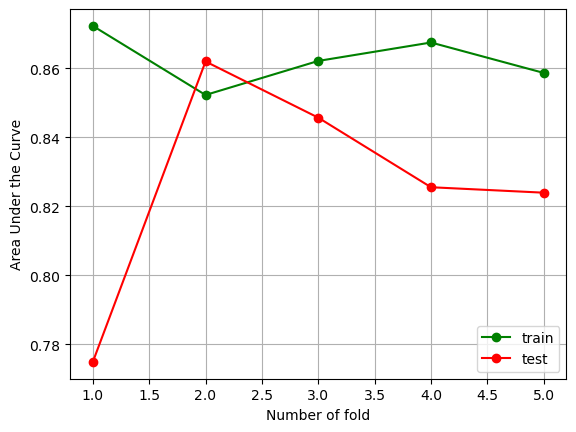

In [35]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[ 90  18]
 [ 29 123]]
Auc Score 0.8586440058479532
Accuracy Score 0.8192307692307692
Classification report:               precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       108
         1.0       0.87      0.81      0.84       152

    accuracy                           0.82       260
   macro avg       0.81      0.82      0.82       260
weighted avg       0.82      0.82      0.82       260

Decision Tree Testing Result
[[18  3]
 [10 33]]
Auc Score 0.8239202657807309
Accuracy Score 0.796875
Classification report:               precision    recall  f1-score   support

         0.0       0.64      0.86      0.73        21
         1.0       0.92      0.77      0.84        43

    accuracy                           0.80        64
   macro avg       0.78      0.81      0.79        64
weighted avg       0.83      0.80      0.80        64



In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = stacking
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

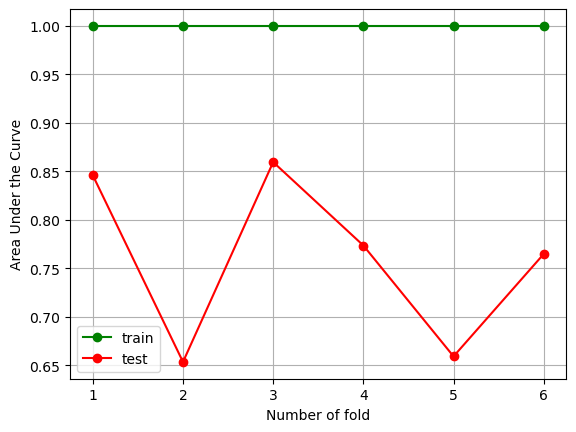

In [8]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
best_grid = stacking
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[113   0]
 [  0 157]]
Auc Score 1.0
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       113
         1.0       1.00      1.00      1.00       157

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

Decision Tree Testing Result
[[10  6]
 [ 9 29]]
Auc Score 0.7648026315789473
Accuracy Score 0.7222222222222222
Classification report:               precision    recall  f1-score   support

         0.0       0.53      0.62      0.57        16
         1.0       0.83      0.76      0.79        38

    accuracy                           0.72        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.74      0.72      0.73        54

